In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from numpy import mean
plt.style.use('ggplot')

In [28]:
data = pd.read_csv('creditcard.csv')

In [29]:
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [30]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

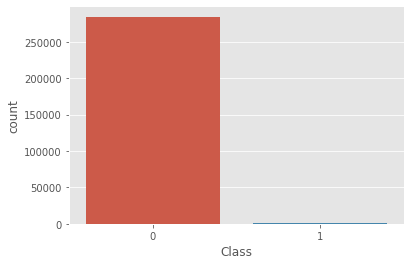

In [31]:
sb.countplot(x='Class', data=data)

### Here you can see our data is very imbalanced
Training models on inbalanced data can result in overfitting. If our model just guessed that every transaction was a legitiment transaction, it would have a high accuracy. To combat this, we will undersample our data.

In [32]:
data.Class[data.Class == 1].count()

492

In [33]:
data.Class[data.Class == 0].count()

284315

First lets scale our time and amount features

In [34]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [35]:
data.Time.describe()

count    284807.000000
mean          0.118914
std           0.557903
min          -0.994983
25%          -0.358210
50%           0.000000
75%           0.641790
max           1.035022
Name: Time, dtype: float64

### Now lets split our data. We will use 80% of our data to train on. We do this before undersampling so we don't train on data we will be testing on

In [36]:
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

### Now we undersample our negatives so we have the same amount of positive and negative fradulent transactions 

In [37]:
positives = train[train.Class == 1]
negatives = train[train.Class == 0]

In [38]:
negativeSample = negatives.sample(positives.Class.count())

In [39]:
df = pd.concat([negativeSample, positives], axis=0)

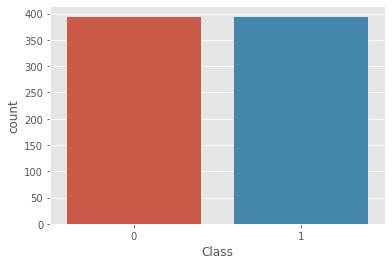

In [40]:
sb.countplot(x='Class', data=df)

### Now that our data is no longer inbalanced, we can start training

In [41]:

X = df.drop('Class', axis=1)
y = df['Class']

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Note: it is important to train on the original dataset, not the undersampled dataset. Also, since we split our data before undersampling it, the data we trained on is not a subset of the data we test on

In [43]:
X = test.drop('Class', axis=1)
y = test['Class']
score = clf.score(X, y)
print(score)

0.9713312617404891


### Hope I did everything correct, leave a comment with advice or if I messed something up. Toodles